# Effects of Big Data on the Healthcare System

In this project, we're going to demonstrate the effects of big data on the healthcare system. We will achieve this by using a dataset to build machine learning models that can help in the diagnosis of heart disease. The models will the be used in a simple web application powered by Python(django backend) and JavaScript(React frontend) that users can access to predict their likelyhood of having heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Import dataset

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

## Explore dataset

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [7]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=319795, step=1)

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### How many records do we have?

In [12]:
len(df)

319795

### What is the relationship between heart disease and smoking?

In [13]:
pd.crosstab(df["HeartDisease"], df["Smoking"])

Smoking,No,Yes
HeartDisease,,
No,176551,115871
Yes,11336,16037


### What is the relationship between heart disease and Alcohol drinking?

In [14]:
pd.crosstab(df["HeartDisease"], df["AlcoholDrinking"])

AlcoholDrinking,No,Yes
HeartDisease,,
No,271786,20636
Yes,26232,1141


### What is the relationship between Heart disease and gender?

In [15]:
pd.crosstab(df["HeartDisease"], df["Sex"])

Sex,Female,Male
HeartDisease,,
No,156571,135851
Yes,11234,16139


### What is the relationship between heart disease and stroke? 

In [16]:
pd.crosstab(df["HeartDisease"], df["Stroke"])

Stroke,No,Yes
HeartDisease,,
No,284742,7680
Yes,22984,4389


### What is the relationship between heart disease and mental health?

In [17]:
pd.crosstab(df["HeartDisease"], df["MentalHealth"])

MentalHealth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
HeartDisease,,,,,,,,,,,,,,,,,,,,,
No,187186,8678,15454,9808,5056,13267,1398,5210,1023,184,...,310,89,63,59,1756,55,117,459,278,15086
Yes,18215,613,1041,658,323,882,112,318,71,19,...,42,9,5,8,198,4,9,56,39,2287


### What is the relationship between heart disease and age category?

In [18]:
pd.crosstab(df["HeartDisease"], df["AgeCategory"])

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
HeartDisease,,,,,,,,,,,,,
No,20934,16822,18527,20254,20520,21047,23999,27555,30359,30050,26218,17433,18704
Yes,130,133,226,296,486,744,1383,2202,3327,4101,4847,4049,5449


### What is the relationship between heart disease and sleep time?

In [19]:
pd.crosstab(df["HeartDisease"], df["SleepTime"])

SleepTime,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
HeartDisease,,,,,,,,,,,,,,,,,,,,,
No,491,660,1645,6570,17154,61294,91426,89244,14345,6631,...,165,202,19,81,2,48,2,6,3,24
Yes,60,128,347,1180,2030,5427,6325,8358,1696,1165,...,24,34,2,21,1,16,0,3,0,6


<Axes: >

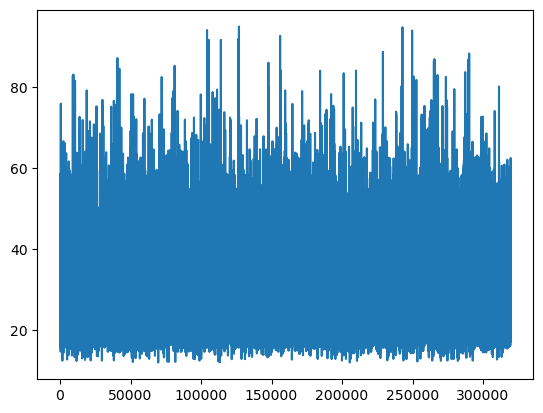

In [20]:
df["BMI"].plot()

<Axes: >

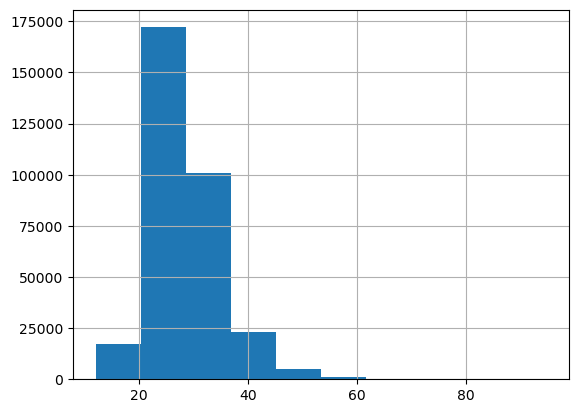

In [22]:
df["BMI"].hist()

<Axes: >

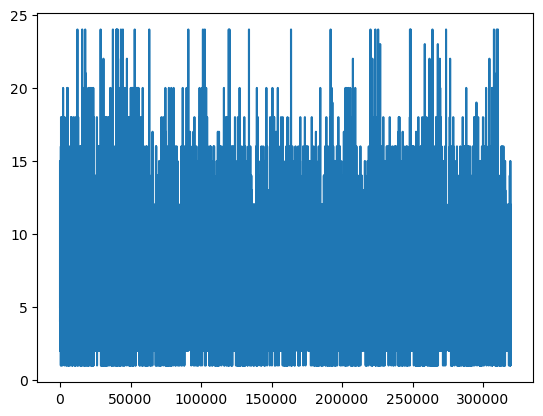

In [21]:
df["SleepTime"].plot()

<Axes: >

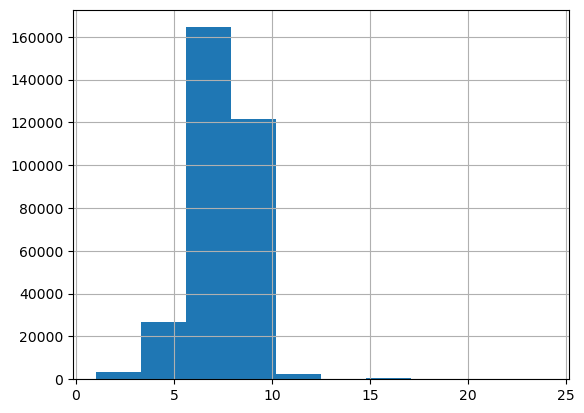

In [23]:
df["SleepTime"].hist()

<Axes: >

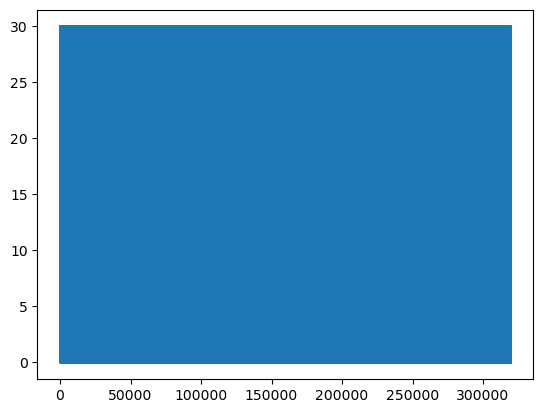

In [24]:
df["MentalHealth"].plot()

<Axes: >

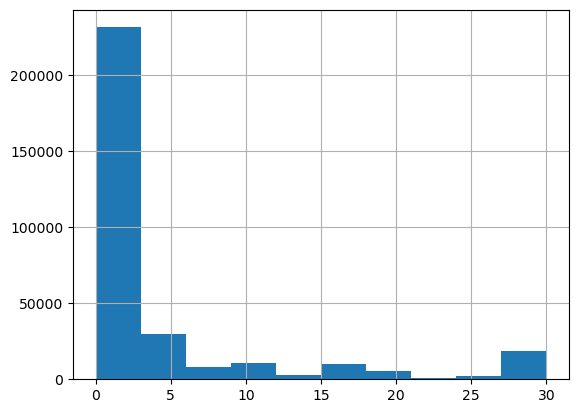

In [25]:
df["MentalHealth"].hist()

<Axes: >

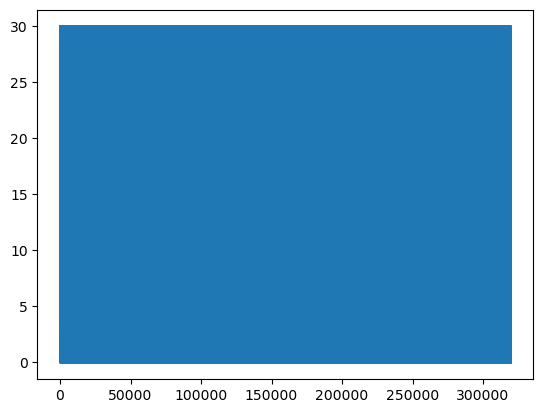

In [26]:
df["PhysicalHealth"].plot()

<Axes: >

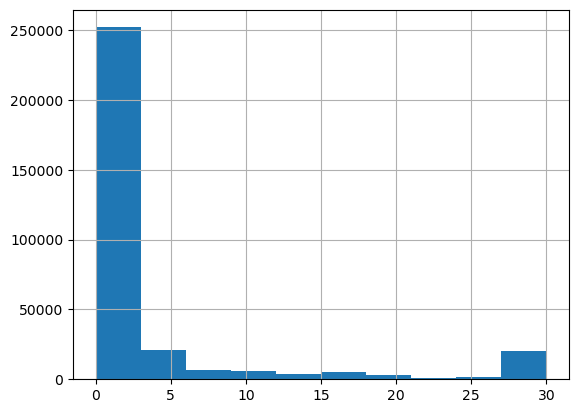

In [27]:
df["PhysicalHealth"].hist()